In [1]:
import numpy as np
import matplotlib.pyplot as plt

# get data
eeg_data = np.genfromtxt("data/joined.csv", delimiter=",").astype(np.float32)
eeg_data.shape

(12, 170752)

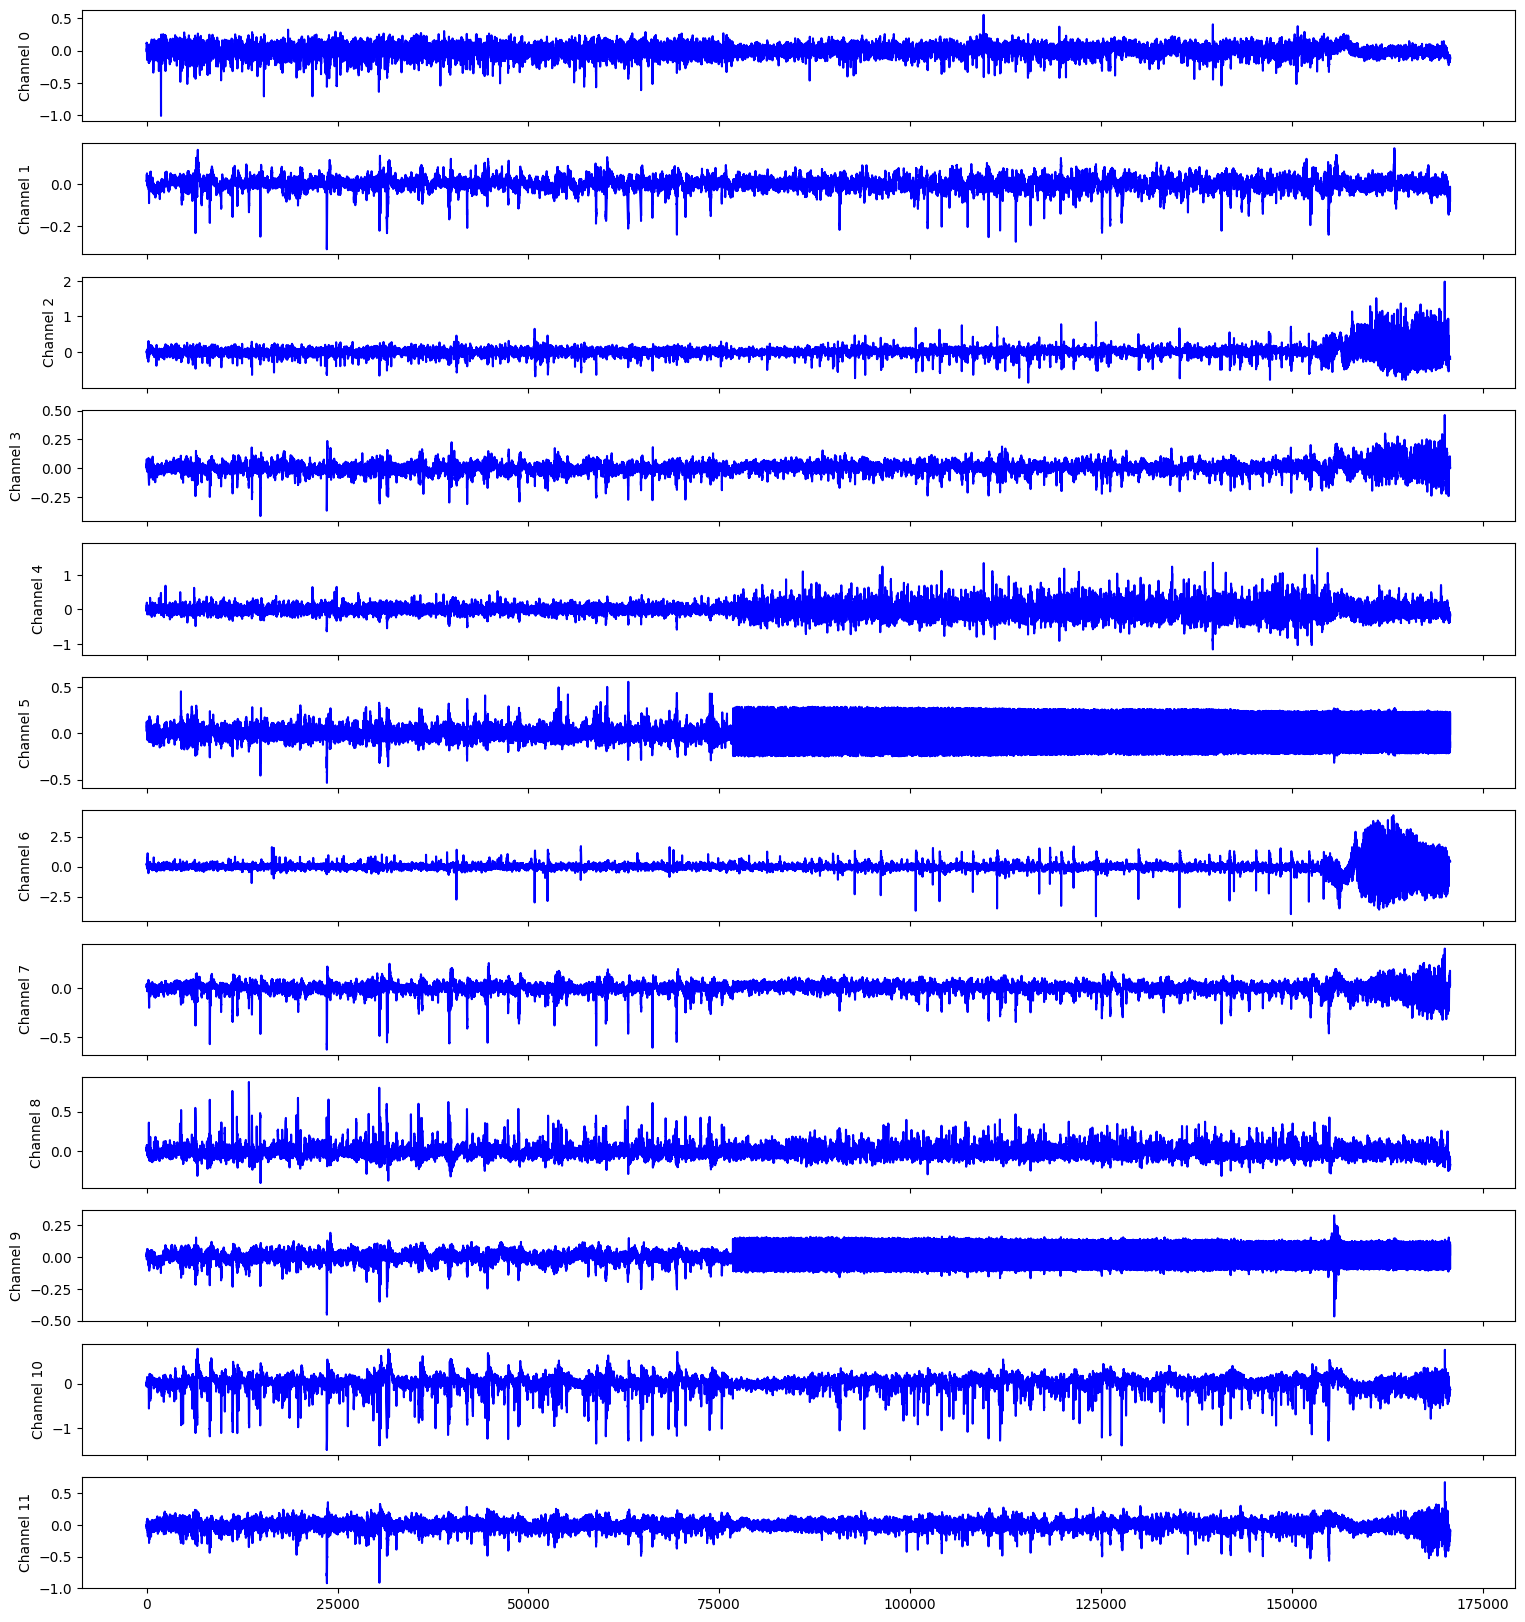

In [9]:
# visualize for good measure
time = [i for i in range(eeg_data.shape[1])]

fig, axs = plt.subplots(eeg_data.shape[0], 1, sharex=True)
fig.set_size_inches(18.5, 20.5)

for c in range(eeg_data.shape[0]):
    axs[c].plot(time, eeg_data[c], 'b')
    axs[c].set_ylabel(f"Channel {c}")

In [58]:
from importlib import reload
import CPD.benchwarm

reload(CPD.benchwarm)


<module 'CPD.benchwarm' from 'c:\\Users\\saidmf\\Desktop\\Projects\\eeg-regime-change\\CPD\\benchwarm.py'>

In [3]:
# put arrays in dictionary for labels
channels = {}
for i in range(len(eeg_data)):
    channels[f"channel_{i}"] = eeg_data[i]

In [59]:
# warm up for 15 seconds
arpwarm = CPD.benchwarm.ARPWarm(channels, n0=10, M=6)
arpwarm.warmup()

Creating AR(p) for channel_2. Determining best order
Creating AR(p) for channel_0. Determining best order
Order AR(17)
Fitting complete
AIC:-6951.051005664503
Log-Likelihood:3494.5255028322513
Innovations generated
Mean:1.227354630350653e-15
Std-dev:0.015210280284034434

Order AR(53)
Fitting complete
AIC:-7916.04427740622
Log-Likelihood:4013.02213870311
Innovations generated
Mean:-8.62028912437153e-16
Std-dev:0.009190956906644501

Creating AR(p) for channel_3. Determining best order
Order AR(52)
Fitting complete
AIC:-9488.645328612038
Log-Likelihood:4798.322664306019
Innovations generated
Mean:1.323079810749086e-16
Std-dev:0.004861698517483598

Creating AR(p) for channel_7. Determining best order
Order AR(67)
Fitting complete
AIC:-9001.917379600676
Log-Likelihood:4569.958689800338
Innovations generated
Mean:1.7301471238555163e-16
Std-dev:0.005591973426979657

Creating AR(p) for channel_9. Determining best order
Order AR(54)
Fitting complete
AIC:-7787.11449192808
Log-Likelihood:3949.557

In [62]:
import CPD.benchmark
reload(CPD.benchmark)

<module 'CPD.benchmark' from 'c:\\Users\\saidmf\\Desktop\\Projects\\eeg-regime-change\\CPD\\benchmark.py'>

In [63]:
cpd = CPD.benchmark.Online(arpwarm, k=4)
change_point = cpd.run()

print(f"change point detected at t={change_point}")

STEP 10
channel_8: 
channel_5: 
channel_3: 
channel_7: 
channel_6: 
channel_4: 
channel_9: 
channel_0: 
channel_10: 
channel_2: 
channel_11: 
channel_1: 
STEP 11
channel_8: 
channel_2: 
channel_2 Rejection incremented 1
channel_5: 
channel_3: 
channel_7: 
channel_6: 
channel_4: 
channel_0: 
channel_10: 
channel_10 Rejection incremented 1
channel_9: 
channel_11: 
channel_1: 
STEP 12
channel_8: 
channel_5: 
channel_3: 
channel_7: 
channel_6: 
channel_4: 
channel_9: 
channel_0: 
channel_10: 
channel_2: 
channel_2 Rejection incremented 2
channel_11: 
channel_1: 
STEP 13
channel_8: 
channel_2: 
channel_5: 
channel_3: 
channel_7: 
channel_6: 
channel_4: 
channel_0: 
channel_10: 
channel_9: 
channel_11: 
channel_1: 
channel_1 Rejection incremented 1
STEP 14
channel_8: 
channel_5: 
channel_3: 
channel_7: 
channel_6: 
channel_4: 
channel_9: 
channel_0: 
channel_0 Rejection incremented 1
channel_10: 
channel_2: 
channel_2 Rejection incremented 1
channel_11: 
channel_1: 
STEP 15
channel_8: 
chann

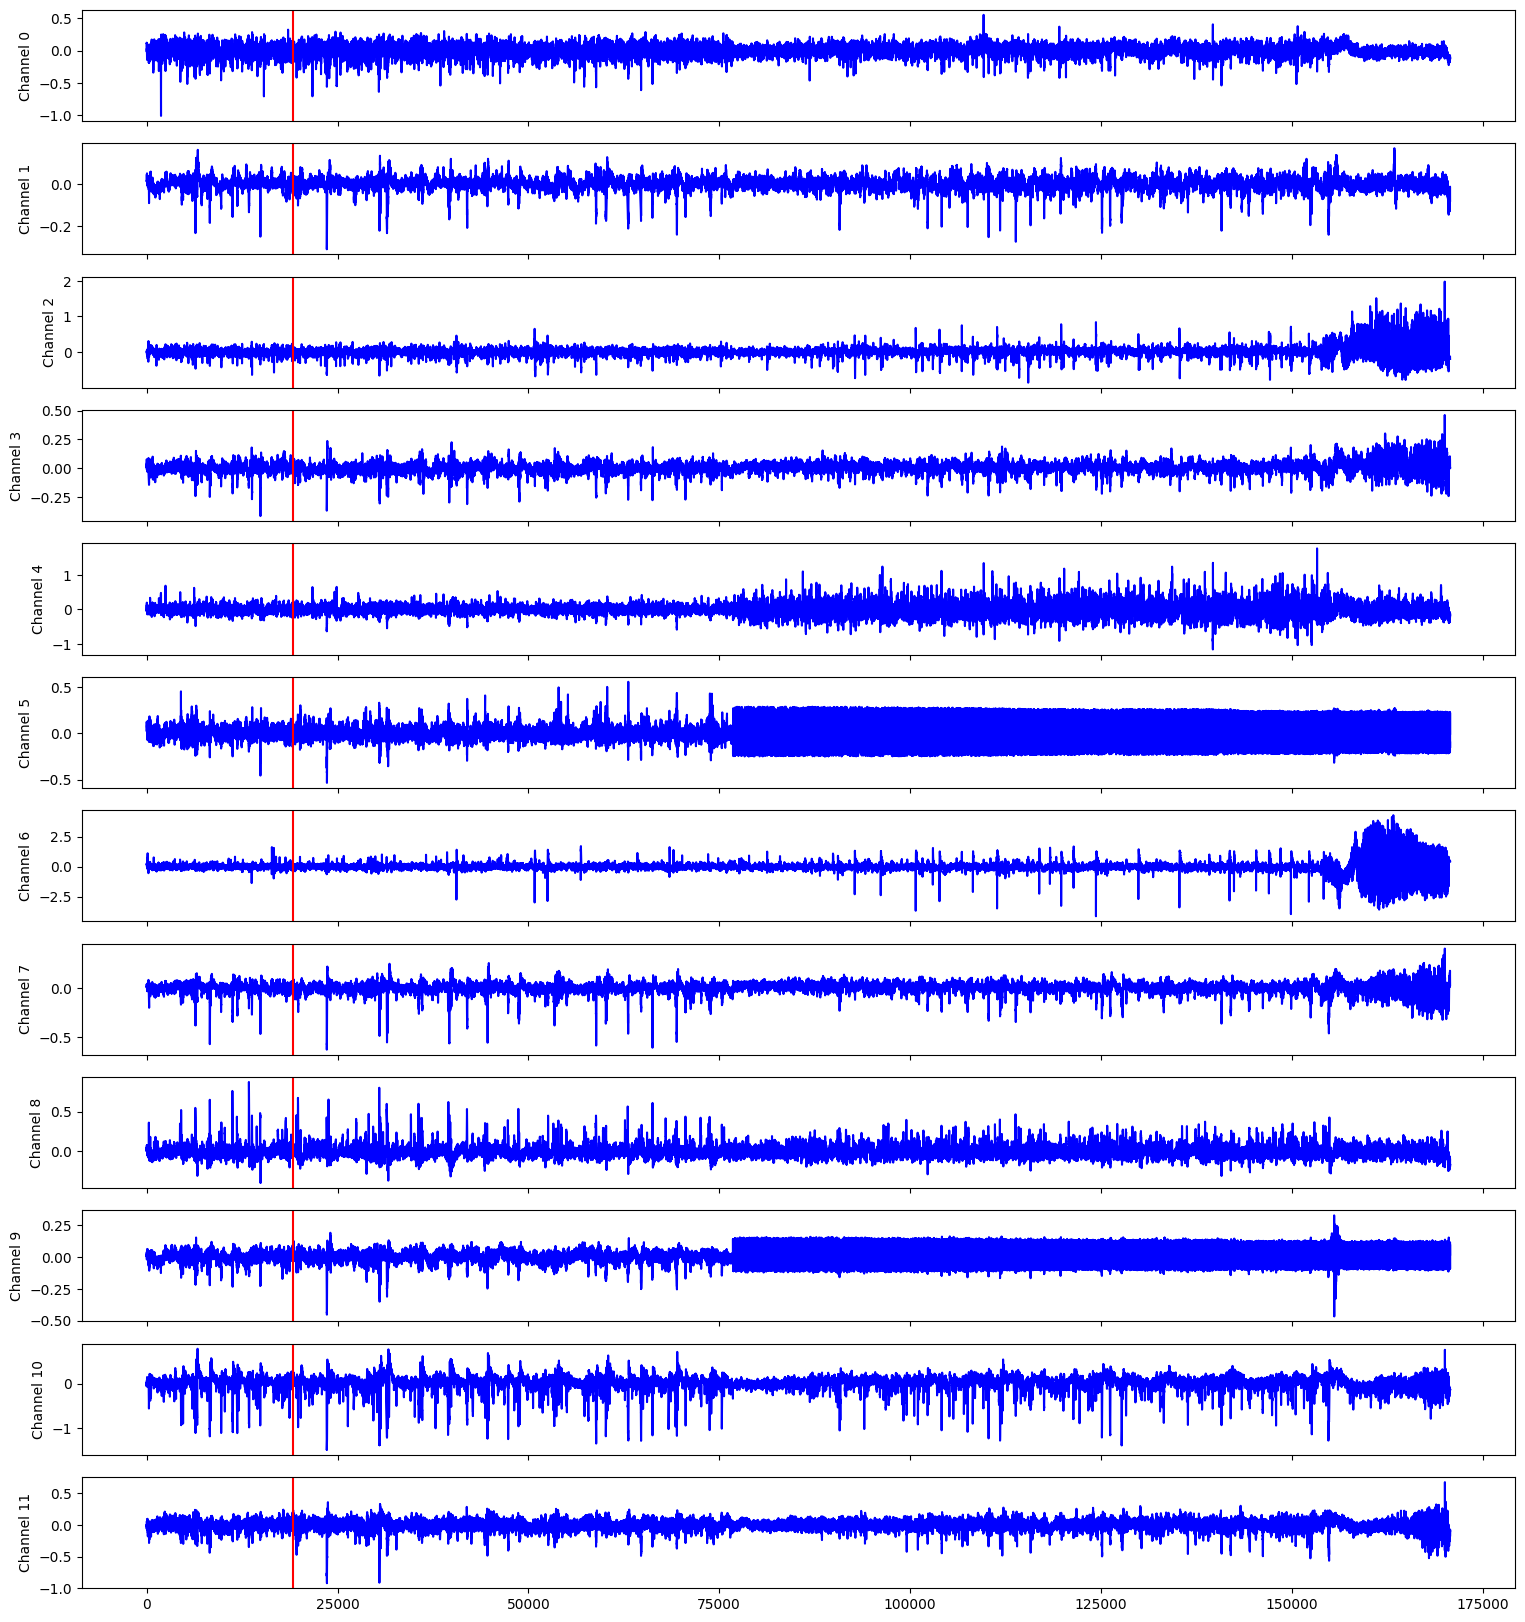

In [65]:
time = [i for i in range(eeg_data.shape[1])]

fig, axs = plt.subplots(eeg_data.shape[0], 1, sharex=True)
fig.set_size_inches(18.5, 20.5)

for c in range(eeg_data.shape[0]):
    axs[c].plot(time, eeg_data[c], 'b')
    axs[c].axvline(x=change_point, c='r')
    axs[c].set_ylabel(f"Channel {c}")

Utilize the online version of the algorithm to tune your hyperparameters.